<a href="https://colab.research.google.com/github/mrjupitercairo/AIRBNB/blob/main/Airbnb%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIRBNB**

Airbnb is a service that lets property owners rent out their spaces to travelers looking for a place to stay. Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Key understanding to be discussed 
1. Which Room type is mostly prefered?
2. Dose the price is a key factor?
3. Which neighbouthood having more host?
4. Define the corelation between different variables?
5. In which room type total number of nights are spent?
6. Which is the most busiest Host ?

GITHUB LINK

https://github.com/mrjupitercairo/AIRBNB

**Importing Libraries** 

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns



In [335]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

**Importing the Dataset**

In [336]:
path='https://raw.githubusercontent.com/mrjupitercairo/AIRBNB/main/Dataset.csv'
df= pd.read_csv(path, skipinitialspace=True,)

In [337]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [339]:
df.shape

(48895, 16)

**Cleaning of Dataset**

In [340]:
df['reviews_per_month'].fillna(0,inplace=True)
df['last_review'].fillna(0,inplace=True)
df['name'].fillna(0,inplace=True)
df['host_name'].fillna(0,inplace=True)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [342]:
df.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [343]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(48895, 16)

**`Visualisations`**

1. Which Room type is mostly preferred?




In [344]:
Room_Type = df.groupby(['room_type'])['number_of_reviews'].max().reset_index()
Room_Type = Room_Type.sort_values(by='number_of_reviews', ascending=False).head(5)
Room_Type

,room_type,number_of_reviews
1,Private room,629
0,Entire home/apt,488
2,Shared room,454


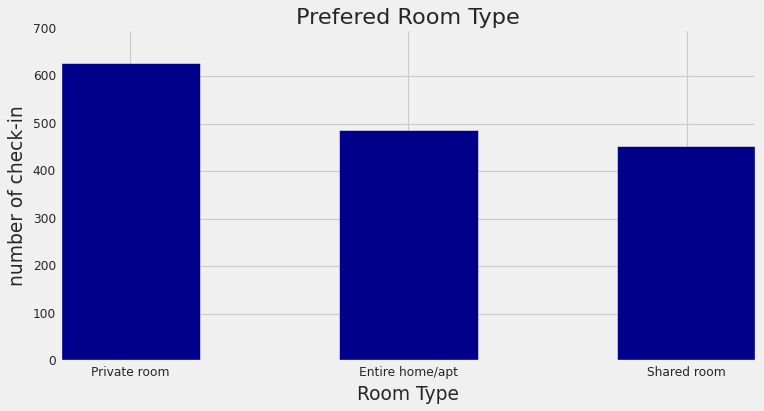

In [345]:
name = Room_Type['room_type']
reviews = Room_Type['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(name, reviews,color ='darkblue',
        width = 0.5)
 
plt.xlabel("Room Type")
plt.ylabel("number of check-in")
plt.title("Prefered Room Type")
plt.show()

Private room is mostly prefered by the customer.

Dona, Jj, Maya, carol and Danielle are some of the busiest host . All the host is having private room type and also the host is located in Queens and Manhattan.

2. **Dose the price is a key factor?**

In [346]:
price_area = df.groupby(['price',])['number_of_reviews'].count().reset_index()
price_area

,price,number_of_reviews
0,0,11
1,10,17
2,11,3
3,12,4
4,13,1
...,...,...
669,7703,1
670,8000,1
671,8500,1
672,9999,3


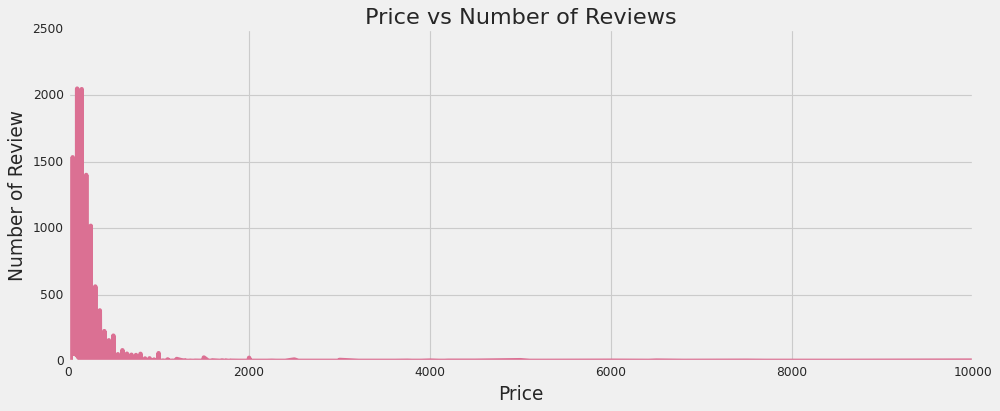

In [347]:
area = price_area['price']
price = price_area['number_of_reviews']
fig = plt.figure(figsize = (13, 5))
plt.plot(area,price,color="PaleVioletRed")
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

Most of the customer is prefering to book appartments/ private Rooms with less price.

**3.Which neighbouthood having more host?**

In [348]:
Host_Available = df.groupby(['neighbourhood_group'])['host_id'].count().reset_index()
Host_Available = Host_Available.sort_values(by='host_id',ascending=False).head(5)
Host_Available

,neighbourhood_group,host_id
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


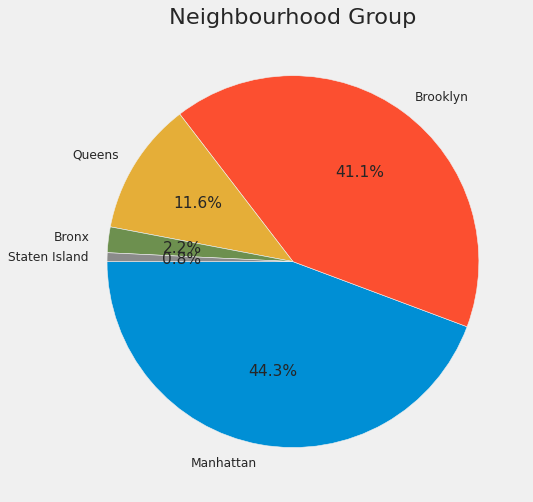

In [349]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

Manhattan is having more host. its having 44.3% .Following that Brooklyn is having second most host . Brooklyn is having 41.1% .

4.Define the corelation between different variables?

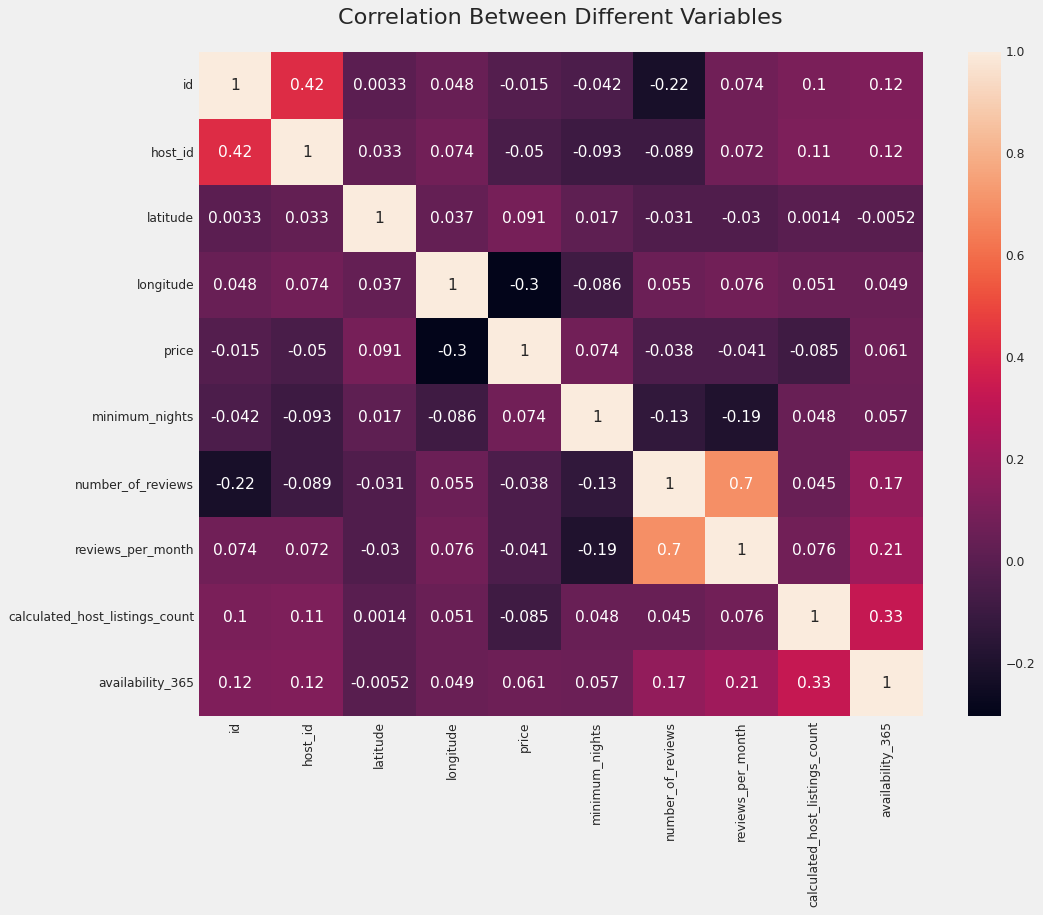

In [350]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

From the following data , those two attribute number of reviews and reviews per month are co related . Compairing all the attribute , there is no other corelation found between the attribute of the dataset.

5. In which room type total number of nights are spent?

In [351]:
list(df['room_type'].unique())
total_room=df.groupby(  'room_type')['minimum_nights'].sum().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types.head()


,room_type,minimum_nights
2,Shared room,7511
1,Private room,120067
0,Entire home/apt,216152


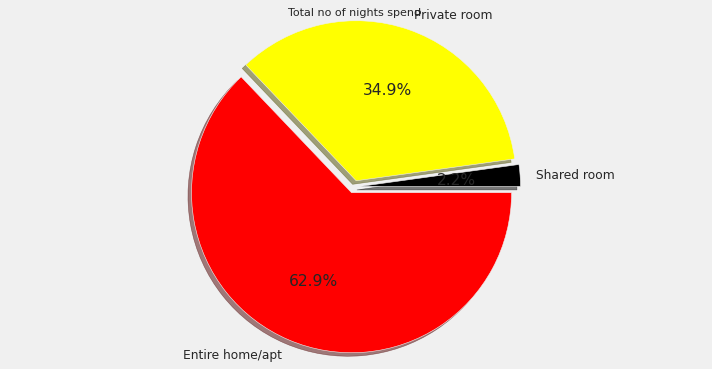

In [352]:
labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])
# create color parameter
colors=['Black','yellow','Red']
# create explode
explode = (0.04, 0.04, 0.04)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Total no of nights spend ', fontsize=10)
plt.axis("equal")  
plt.show()

Data are pointing to most number of checkins were in Private rooms and the data above mentioned is pointing most number of nights were spend in Entire home / Appartment . its all about 62.9% . Followed by private room with 34.9% .

6. Which is the most busiest Host ?

In [353]:
busiest_Group = df.groupby(['host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_Group = busiest_Group.sort_values(by='number_of_reviews', ascending=False).head(5)
busiest_Group

,host_name,room_type,neighbourhood_group,number_of_reviews
4604,Dona,Private room,Queens,629
8451,Jj,Private room,Manhattan,607
12050,Maya,Private room,Queens,543
2875,Carol,Private room,Manhattan,540
3994,Danielle,Private room,Queens,510


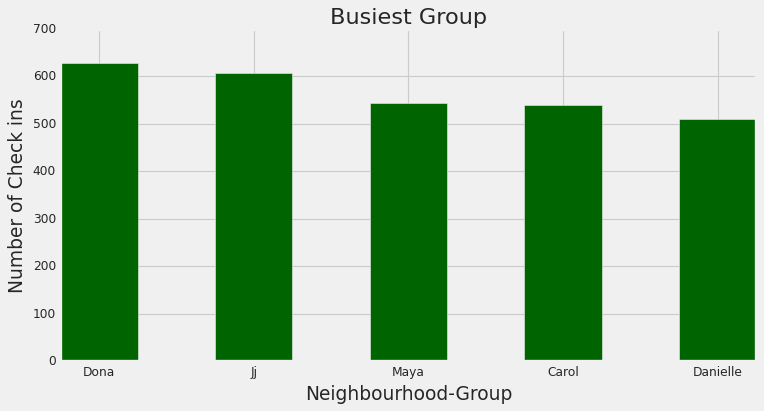

In [354]:
name = busiest_Group['host_name']
reviews = busiest_Group['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(name, reviews, color ='darkgreen',
        width = 0.5)
 
plt.xlabel("Neighbourhood-Group")
plt.ylabel("Number of Check ins")
plt.title("Busiest Group")
plt.show()

Dona, Jj, Maya, carol and Danielle are some of the busiest host . All the host is having private room type and also the host is located in Queens and Manhattan.

**Conclusion**

1. Most of the customers are willing to pay less amount for their stays .
2. Mostly customers are prefered to stay in private room . 
3. Customers are mostly booking private rooms in Queens and Manhattan. So these are the most Visited tourist places.
4. Queens is the most visited place in the dataset and queens is in the    
  3rd spot in case of total number of host . Therefore Queens is the most 
  suitable place for a new host .
5. most number of checkins were in Private rooms and the data above mentioned is pointing most number of nights were spend in Entire home / Appartment . its all about 62.9% . Followed by private room with 34.9% .
6. those two attribute number of reviews and reviews per month are co related . Compairing all the attribute , there is no other corelation found between the attribute of the dataset.